In [1]:
run algs.py

Part 1 Questions:

1)
    a) Parameters required by the algorithm include a scoring matrix, 2 sequences, and gap opening and extension penalties. The variables used by the algorithm include four M x N matrices (where M and N are the lengths of the two input sequences, respectively): one for alignment scores, one for traceback, and two for keeping track of gap extension penalties for each of the sequences.
    b) The quantity returned is the sequence alignment score.
    c) The run time complexity is O(M x N)
    
2)
    The functionalities shared between the algorithms are: creating 4 different M x N Matrices, getting the alignment score for a given pair of amino acid residues, getting and setting values in the 4 M x N matrices, reading the scoring matrix, reading in the sequences, and calculating gap opening and extension penalties.
    
3)
    Affine-gap alignment differs from linear-gap alignment in that affine-gap requires two extra M x N matrices for keeping track of the gap penalty for a given pair of residues in the two sequences, whereas linear-gap simply uses the same gap penalty for all pairs of residues.
    
4)
    *API in README*

In [16]:
######
# Unit Tests
######
fa1 = '../sequences/prot-0004.fa'
fa2 = '../sequences/prot-0008.fa'
scoringMatrixFile = 'BLOSUM50.mat'
gapOpening = 11
gapExtension = 3

swaTest = SmithWaterman(scoringMatrixFile, fa1, fa2, gapOpening, gapExtension)
nwaTest = NeedlemanWunsch(scoringMatrixFile, fa1, fa2, gapOpening, gapExtension)


def ioFastaTest(swaTest):
    assert swaTest.readFafsaSeq('../sequences/prot-0004.fa') == 'SLEAAQKSNVTSSWAKASAAWGTAGPEFFMALFDAHDDVFAKFSGLFSGAAKGTVKNTPEMAAQAQSFKGLVSNWVDNLDNAGALEGQCKTFAANHKARGISAGQLEAAFKVLSGFMKSYGGDEGAWTAVAGALMGEIEPDM'
    print('"I/O of Protein FAFSA Sequence" Test Passed')

ioFastaTest(swaTest)

def ioScoringMatrixTest(swaTest):
    testScoringMatrix, testHeader = swaTest.readScoringMatrix('BLOSUM50.mat')
    assert testScoringMatrix[0][0] == 5 #how do I avoid truth value of array ValueError?
    assert testHeader[0] == 'A'
    print('"I/O of Scoring Matrix" Test Passed')

ioScoringMatrixTest(swaTest)

def identicalSequencesTest():
    swaTest2 = SmithWaterman(scoringMatrixFile, fa1, fa1, gapOpening, gapExtension)
    nwaTest2 = NeedlemanWunsch(scoringMatrixFile, fa1, fa1, gapOpening, gapExtension)
    swaTest2.align()
    swaTest2.traceback()
    nwaTest2.align()
    nwaTest2.traceback()
    assert swaTest2.alignedSequences[0] == swaTest2.alignedSequences[1]
    assert nwaTest2.alignedSequences[0] == nwaTest2.alignedSequences[1]
    print('"Identical Sequences" Test Passed')

identicalSequencesTest()

def alignmentScoreTest():
    pass

"I/O of Protein FAFSA Sequence" Test Passed
"I/O of Scoring Matrix" Test Passed
"Identical Sequences" Test Passed


---Part 2---

In [87]:
####
# Question 1
####

scoringMatrixFile = 'BLOSUM50.mat'
gapOpening = 11
gapExtension = 3

def readPosandNegFiles():
    faFilePairs = []
    
    with open('../scoring_matrices/Pospairs.txt','r') as f:
        for line in f:
            fa1, fa2 = line.split()
            fa1 = '../' + fa1
            fa2 = '../' + fa2
            faFilePairs.append((fa1, fa2))
    f.close()
    

    with open('../scoring_matrices/Negpairs.txt','r') as f:
        for line in f:
            fa1, fa2 = line.split()
            fa1 = '../' + fa1
            fa2 = '../' + fa2
            faFilePairs.append((fa1, fa2))
    f.close()
    
    return faFilePairs
    

def alignAllPosandNegSeqs(faFilePairs, scoringMatrixFile, gapOpening, gapExtension, isNW = False):

    allAlignmentScores = []
    
    for faFilePair in faFilePairs:
        fa1, fa2 = faFilePair
        if isNW == True:
            nwa = NeedlemanWunsch(scoringMatrixFile, fa1, fa2, gapOpening, gapExtension)
            nwa.align()
            allAlignmentScores.append(nwa.alignmentScore)
        else:    
            swa = SmithWaterman(scoringMatrixFile, fa1, fa2, gapOpening, gapExtension)
            swa.align()
            allAlignmentScores.append(swa.alignmentScore)
    
    return allAlignmentScores

faFilePairs = readPosandNegFiles()
allAlignmentScores = alignAllPosandNegSeqs(faFilePairs, scoringMatrixFile, gapOpening, gapExtension)

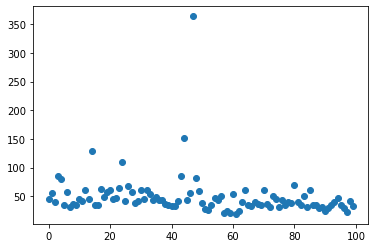

In [88]:
import matplotlib.pyplot as plt

plt.scatter(list(range(0,len(allAlignmentScores))), allAlignmentScores)
#plt.ylim(top=150)
plt.show()

Question 1 continued: I would describe this data as mostly evenly distributed, but with some outliers on only one half of the graph.

Threshold value = 49.13


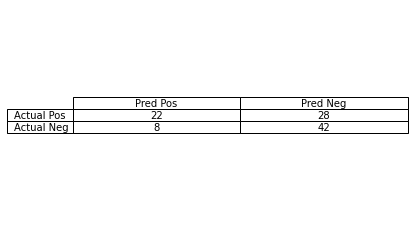

In [21]:
####
# Question 2
####

def calcThreshold(allAlignmentScores):
    threshold = sum(allAlignmentScores) / len(allAlignmentScores)
    return threshold

def calcConfusionMatrix(threshold, allAlignmentScores):
    truePos, falseNeg = 0, 0
    for score in allAlignmentScores[:50]:
        if score > threshold:
            truePos += 1
        else:
            falseNeg += 1
        
    trueNeg, falsePos = 0,0
    for score in allAlignmentScores[50:]:
        if score < threshold:
            trueNeg += 1
        else:
            falsePos += 1
    return truePos, falseNeg, falsePos, trueNeg


def plotConfusionMatrix(truePos, falseNeg, falsePos, trueNeg):
    columnLabels = ['Pred Pos', 'Pred Neg']
    rowLabels = ['Actual Pos', 'Actual Neg']
    tableVals = [[truePos, falseNeg],[falsePos, trueNeg]] #a list for each row
    
    plt.table(rowLabels = rowLabels, colLabels = columnLabels, cellText = tableVals, cellLoc = 'center', \
              loc = 'center')
    plt.axis('off')
    plt.show()
    
threshold = calcThreshold(allAlignmentScores)
print('Threshold value = %.2f' % threshold)
truePos, falseNeg, falsePos, trueNeg = calcConfusionMatrix(threshold, allAlignmentScores)
plotConfusionMatrix(truePos, falseNeg, falsePos, trueNeg)


Question 2 Continued: The threshold value is 49.13.  The confusion matrix suggests that the algorithm did a good job of accurately classifying Actual Negatives, but it did a poor job of classifying Actual Positives (in fact, it inaccurately classified MOST of the Actual Positives).

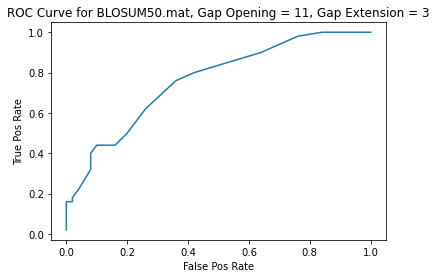

In [89]:
####
# Question 3
####

#ROC curve is True Pos Rate over False Pos Rate.  Normalize axes.

import math

def calcPointsInROCCurve(allAlignmentScores):
    allTruePos = []
    allFalsePos = []

    for threshold in range(math.floor(min(allAlignmentScores)), math.floor(max(allAlignmentScores)), \
                           math.floor((max(allAlignmentScores)-min(allAlignmentScores))/100)):
        truePos, falseNeg, falsePos, trueNeg = calcConfusionMatrix(threshold, allAlignmentScores)
        allTruePos.append(truePos)
        allFalsePos.append(falsePos)

    allTruePos = np.array(allTruePos)/max(allTruePos)
    allFalsePos = np.array(allFalsePos)/max(allFalsePos)
    
    return allTruePos, allFalsePos
    
def plotROCCurve(allAlignmentScores, scoringMatrixFile, gapOpening, gapExtension):
    allTruePos, allFalsePos = calcPointsInROCCurve(allAlignmentScores)

    plt.plot(allFalsePos, allTruePos)
    plt.xlabel('False Pos Rate')
    plt.ylabel('True Pos Rate')
    plt.title('ROC Curve for %s, Gap Opening = %d, Gap Extension = %d' % (scoringMatrixFile, gapOpening, gapExtension))
    plt.show()
    
plotROCCurve(allAlignmentScores, scoringMatrixFile, gapOpening, gapExtension)

In [56]:
####
# Question 4
####


# Integrate under ROC curve

allTruePos, allFalsePos = calcPointsInROCCurve(allAlignmentScores)

#dx is the distance in the x-direction between each point on curve (1 / 100 = 0.01)
#area = np.trapz(allTruePos, dx = 0.01)

#print('Area Under ROC Curve = %.6f' % area)


print(allTruePos, allFalsePos)


def calcAreaUnderCurve(allTruePos, allFalsePos):
    area = 0
    for i in range(len(allTruePos)-1):
        area += (((allTruePos[i]+allTruePos[i+1])/2) * (allFalsePos[i] - allFalsePos[i+1]))
    return area

area = calcAreaUnderCurve(allTruePos, allFalsePos)
print('Area Under ROC Curve = %.6f' % area)

[1.   1.   1.   1.   0.98 0.88 0.78 0.74 0.6  0.54 0.44 0.4  0.36 0.32
 0.26 0.2  0.2  0.18 0.18 0.18 0.16 0.14 0.1  0.1  0.08 0.08 0.08 0.08
 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02] [1.   0.94 0.86 0.8  0.68 0.64 0.46 0.32 0.2  0.16 0.16 0.1  0.1  0.08
 0.02 0.02 0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   

Question 4 continued: The area under the ROC curve (AUROC) is a measure of the performance of the algorithm across all possible classification thresholds.  You cannot confidently assess the performance of the algorithm with this value alone, because the algorithm's performance depends on which threshold is chosen in the end by the modeller.

In [57]:
####
# Question 5
####

# Range of Gap Opening (1-20) and Extension (1-5) Penalties

scoringMatrixFile = 'BLOSUM62.mat'

maxAreaStats = (0,0,0) #area, opening, extension
faFilePairs = readPosandNegFiles()
for gapOpening in range(1,21):
    for gapExtension in range(1,6):
        allAlignmentScores = alignAllPosandNegSeqs(faFilePairs, scoringMatrixFile, gapOpening, gapExtension)
        #plotROCCurve(allAlignmentScores, scoringMatrixFile, gapOpening, gapExtension)
        allTruePos, allFalsePos = calcPointsInROCCurve(allAlignmentScores)
        area = calcAreaUnderCurve(allTruePos, allFalsePos)
        print('Gap Opening = %d, Gap Extension = %d, Area Under ROC Curve = %.6f' % (gapOpening, gapExtension, area))
        if area > maxAreaStats[0]:
            maxAreaStats = area, gapOpening, gapExtension

Gap Opening = 1, Gap Extension = 1, Area Under ROC Curve = 0.741800
Gap Opening = 1, Gap Extension = 2, Area Under ROC Curve = 0.741800
Gap Opening = 1, Gap Extension = 3, Area Under ROC Curve = 0.741800
Gap Opening = 1, Gap Extension = 4, Area Under ROC Curve = 0.741800
Gap Opening = 1, Gap Extension = 5, Area Under ROC Curve = 0.741800
Gap Opening = 2, Gap Extension = 1, Area Under ROC Curve = 0.755400
Gap Opening = 2, Gap Extension = 2, Area Under ROC Curve = 0.770000
Gap Opening = 2, Gap Extension = 3, Area Under ROC Curve = 0.770000
Gap Opening = 2, Gap Extension = 4, Area Under ROC Curve = 0.770000
Gap Opening = 2, Gap Extension = 5, Area Under ROC Curve = 0.770000
Gap Opening = 3, Gap Extension = 1, Area Under ROC Curve = 0.777800
Gap Opening = 3, Gap Extension = 2, Area Under ROC Curve = 0.783000
Gap Opening = 3, Gap Extension = 3, Area Under ROC Curve = 0.794800
Gap Opening = 3, Gap Extension = 4, Area Under ROC Curve = 0.794800
Gap Opening = 3, Gap Extension = 5, Area Under R

In [58]:
print('Max Area = %.5f, Gap Opening = %d, Gap Extension = %d' % (maxAreaStats[0], maxAreaStats[1], maxAreaStats[2]))

Max Area = 0.83280, Gap Opening = 4, Gap Extension = 4


Question 5 Continued: The best performing gap penalty was: gap opening = 4, gap extension = 4.  Since the gap opening penalty is relatively low, it suggests that there was a high likelihood of insertions and deletions in the evolution of these sequences.  The gap extension penalty being equal to the gap opening penalty suggests that gap opening events do not make the insertion/deletion of proceeding nucleotides any more likely (which, with our understanding of insertions and deletions, does not make sense).

AUROC for BLOSUM50.mat = 0.83460
AUROC for BLOSUM62.mat = 0.81660
AUROC for PAM100.mat = 0.75740
AUROC for PAM250.mat = 0.82820


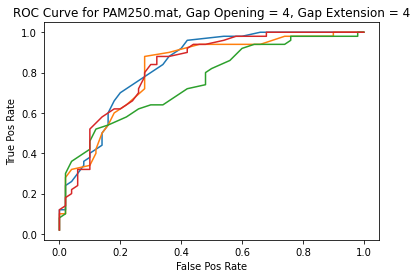

In [83]:
####
# Question 6
####

gapOpening = 4
gapExtension = 4

scoringMatrices = ['BLOSUM50.mat','BLOSUM62.mat','PAM100.mat','PAM250.mat']


for scoringMatrixFile in scoringMatrices:
    allAlignmentScores = alignAllPosandNegSeqs(faFilePairs, scoringMatrixFile, gapOpening, gapExtension, isNW = True)
    plotROCCurve(allAlignmentScores, scoringMatrixFile, gapOpening, gapExtension)
    allTruePos, allFalsePos = calcPointsInROCCurve(allAlignmentScores)
    area = calcAreaUnderCurve(allTruePos, allFalsePos)
    print('AUROC for %s = %.5f' % (scoringMatrixFile, area))
    

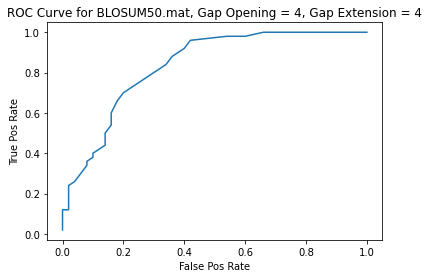

AUROC for BLOSUM50.mat = 0.83460


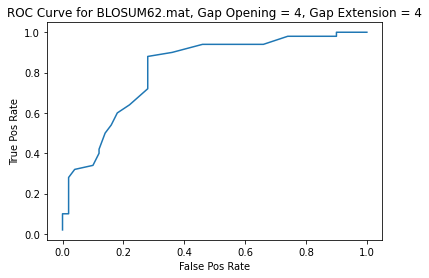

AUROC for BLOSUM62.mat = 0.81660


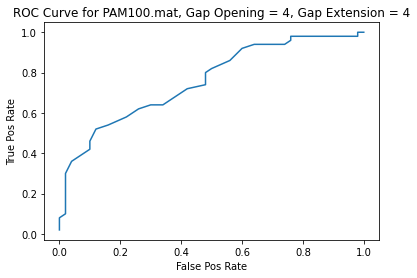

AUROC for PAM100.mat = 0.75740


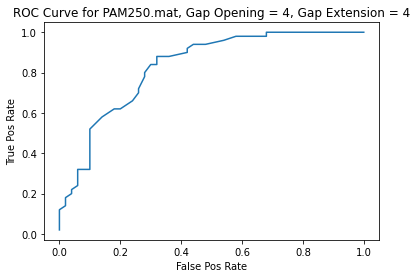

AUROC for PAM250.mat = 0.82820


In [86]:
####
# Question 6
####

gapOpening = 4
gapExtension = 4

scoringMatrices = ['BLOSUM50.mat','BLOSUM62.mat','PAM100.mat','PAM250.mat']


for scoringMatrixFile in scoringMatrices:
    allAlignmentScores = alignAllPosandNegSeqs(faFilePairs, scoringMatrixFile, gapOpening, gapExtension, isNW = True)
    plotROCCurve(allAlignmentScores, scoringMatrixFile, gapOpening, gapExtension)
    allTruePos, allFalsePos = calcPointsInROCCurve(allAlignmentScores)
    area = calcAreaUnderCurve(allTruePos, allFalsePos)
    print('AUROC for %s = %.5f' % (scoringMatrixFile, area))